In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("reduced.csv", delimiter=',')

# Classify timestamps as datetimes
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index(df['Timestamp'], inplace=True)

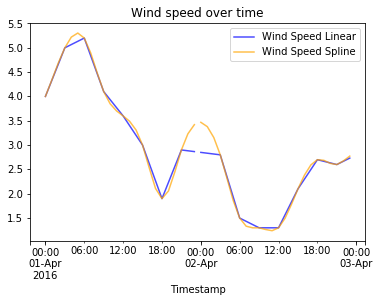

In [19]:
# df.drop(['Sin', 'Cos'], axis=1)
df = pd.read_csv("reduced.csv", delimiter=',')

# Classify timestamps as datetimes
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index(df['Timestamp'], inplace=True)

def interpolate_linear(df):
    df['sin'] = np.sin(np.deg2rad(df['Wind Direction']))
    df['cos'] = np.cos(np.deg2rad(df['Wind Direction']))

    df_lin = df.copy()
    df_lin.interpolate(inplace=True, limit=5)

    df['Wind Direction Linear'] = np.rad2deg(np.arctan2(df_lin['sin'], df_lin['cos'])).apply(full_range)
    df['Wind Speed Linear'] = df_lin['Wind Speed']

    df = df.drop(['sin', 'cos'], axis=1)
    return df

def interpolate_cubic_spline(df):
    df['sin'] = np.sin(np.deg2rad(df['Wind Direction']))
    df['cos'] = np.cos(np.deg2rad(df['Wind Direction']))

    df_spl = df.copy()
    df_spl.interpolate(method='cubic', order=3, inplace=True, limit=5)
    df['Wind Direction Spline'] = np.rad2deg(np.arctan2(df_spl['sin'], df_spl['cos'])).apply(full_range)
    df['Wind Speed Spline'] = df_spl['Wind Speed']

    df = df.drop(['sin', 'cos'], axis=1)
    return df

def full_range(f):
    if f < 0:
        return f + 360
    else:
        return f

    
    
df = df.resample('3600S').asfreq()[:]

interpolate_linear(df)
interpolate_cubic_spline(df)
df = df.drop(['sin', 'cos'], axis=1)

df['Timestamp'].interpolate(method='time')
df['2016-04-01']['Wind Speed Linear'].plot(color='blue', alpha=0.7)
df['2016-04-01']['Wind Speed Spline'].plot(color='orange', alpha=0.7)
df['2016-04-02']['Wind Speed Linear'].plot(color='blue', alpha=0.7, legend='true')
df['2016-04-02']['Wind Speed Spline'].plot(color='orange', alpha=0.7, title='Wind speed over time', legend='true')


# writer = pd.ExcelWriter('Meteorological Interpolated.xlsx')
# df.to_excel(writer,'ledata')
# writer.save()